In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Bootstrap

### Recap

[Government Compensation in California](https://publicpay.ca.gov/Reports/Counties/County.aspx?entityid=42&year=2020)
Let's look at how much Santa Barbara County employees got paid in 2020.

In [2]:
sb_pop = Table.read_table('data/santabarbara-county-salaries-2020.csv').where('TotalWages', are.above(10000))
sb_pop = sb_pop.where('TotalWages', are.above(15*40*52))#.sort('TotalWages')
# show me the employees with the lowest compensation 
sb_pop.sort('TotalWages', descending = False).show(5)

Year,EmployerType,EmployerName,DepartmentOrSubdivision,Position,ElectedOfficial,Judicial,OtherPositions,MinPositionSalary,MaxPositionSalary,ReportedBaseWage,RegularPay,OvertimePay,LumpSumPay,OtherPay,TotalWages,DefinedBenefitPlanContribution,EmployeesRetirementCostCovered,DeferredCompensationPlan,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula,EmployerURL,EmployerPopulation,LastUpdatedDate,EmployerCounty,SpecialDistrictActivities,IncludesUnfundedLiability,SpecialDistrictType
2020,County,Santa Barbara,Probation,Food Services Worker,False,False,nan,37517,44373,nan,29950,1014,0,260,31224,7600,0,59,10212,17871,2% @ 57,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Public Defender,Extra Help,False,False,nan,33116,41024,nan,31280,0,0,0,31280,0,0,0,6051,6051,nan,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,District Attorney,Extra Help,False,False,nan,33116,41024,nan,30704,137,0,447,31288,2114,0,0,1952,4066,nan,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Clerk-Recorder-Assessor,Extra Help,False,False,nan,33116,41024,nan,23959,7230,0,122,31311,0,0,0,0,0,nan,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Public Works,Extra Help,False,False,nan,0,0,nan,30505,761,0,46,31312,0,0,0,0,0,nan,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan


In [3]:
sb_pop.num_rows

4081

/opt/conda/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


Population Median =  79985


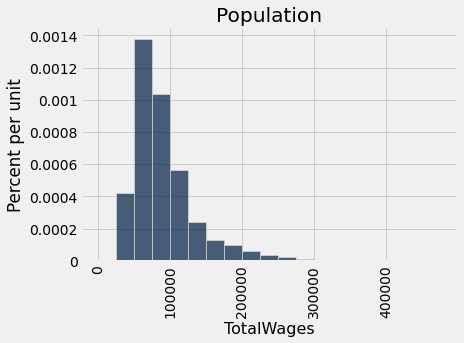

In [4]:
pop_median = percentile(50, sb_pop.column('TotalWages'))
sb_bins = np.arange(0, 500000, 25000)
sb_pop.hist('TotalWages', bins=sb_bins)
print("Population Median = ", pop_median)
plots.title('Population');

Population Median =  79985
Sample Median =  83232


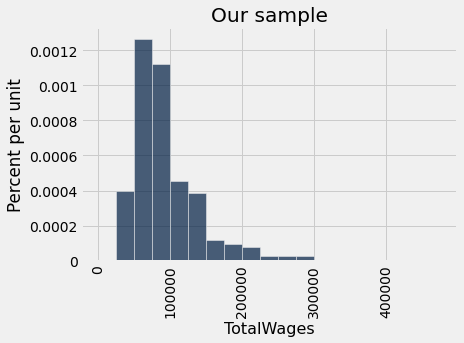

In [5]:
# Random sample of size 300
our_sample = sb_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('TotalWages'))
our_sample.hist('TotalWages', bins=sb_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)
plots.title('Our sample');

In [23]:
help(Table.sample)

Help on function sample in module datascience.tables:

sample(self, k=None, with_replacement=True, weights=None)
    Return a new table where k rows are randomly sampled from the
    original table.
    
    Args:
        ``k`` -- specifies the number of rows (``int``) to be sampled from
           the table. Default is k equal to number of rows in the table.
    
        ``with_replacement`` -- (``bool``) By default True;
            Samples ``k`` rows with replacement from table, else samples
            ``k`` rows without replacement.
    
        ``weights`` -- Array specifying probability the ith row of the
            table is sampled. Defaults to None, which samples each row
            with equal probability. ``weights`` must be a valid probability
            distribution -- i.e. an array the length of the number of rows,
            summing to 1.
    
    Raises:
        ValueError -- if ``weights`` is not length equal to number of rows
            in the table; or, if ``weig

In [6]:
# Empirical distribution of the sample median
# assuming we can just resample from the population
def one_sample_median():
    single_sample = sb_pop.sample(300, with_replacement = False)
    return percentile(50, single_sample.column('TotalWages'))

medians = make_array()
for i in np.arange(1000):
    new_median = one_sample_median()
    medians = np.append(medians, new_median)

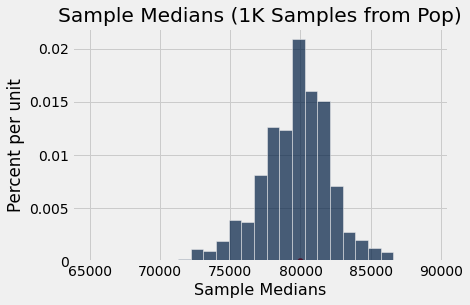

In [7]:
med_bins = np.arange(65000, 90000, 900)

Table().with_column(
    'Sample Medians', medians
).hist('Sample Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.title('Sample Medians (1K Samples from Pop)');

### Bootstrap

Population Median =        79985
Our Sample Median =        83232
Bootstrap Sample Median =  80042


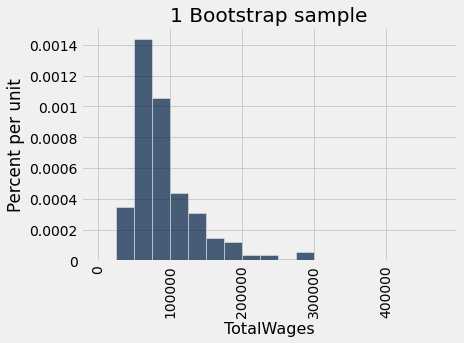

In [8]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('TotalWages', bins=sb_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('TotalWages')))

In [9]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('TotalWages'))

In [14]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

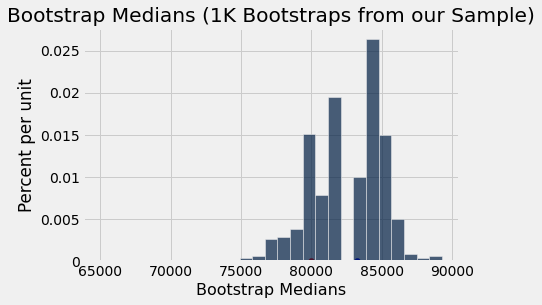

In [15]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

### 95% Confidence Interval

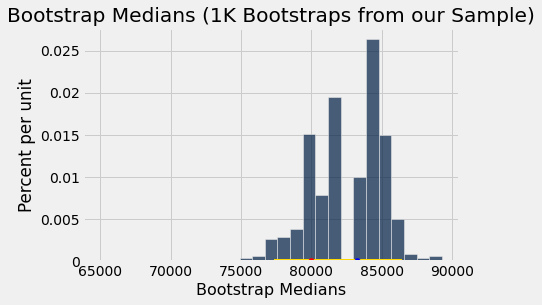

In [16]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=4, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [17]:
# This time we have a sample, but no population data!
births = Table.read_table('data/baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


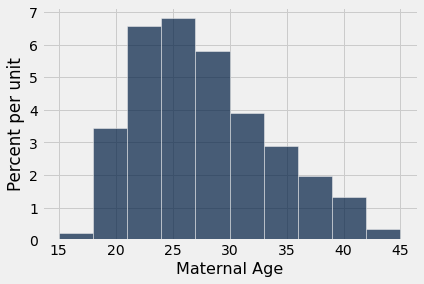

In [18]:
births.hist('Maternal Age')

In [19]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [20]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [21]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

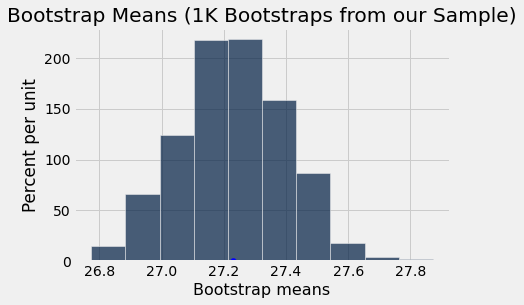

In [22]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');